In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window
%matplotlib inline

# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
#Model
import lightgbm as lgb
from catboost import CatBoostClassifier, Pool
from catboost.utils import eval_metric

#Evaluation
from sklearn.metrics import roc_auc_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/5g-quality-of-service/Quality of Service 5G.csv")

In [3]:
df.shape

(400, 8)

In [4]:
import pandas as pd
from IPython.display import display, HTML

def styled_heading(text):
    return f"""
    <p style="
        font-family: 'Amiri'; 
        font-size: 3rem; 
        color: yellow; 
        text-align: center; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); 
        background-color: #5fa1bc; 
        padding: 20px; 
        border-radius: 20px; 
        border: 7px solid yellow; 
        width:95%">
        {text}
    </p>
    """

def print_error(message):
    display(HTML(styled_heading("Error")))
    print(f"An error occurred: {message}")

# Helper function to generate colored horizontal line
def colored_line(color='#323c6a'):
    return ""

def print_dataset_analysis(df, n_top=5, heading_color='#323c6a', line_color='#323c6a'):
    try:
        styled_df = df.head(n_top).style.set_properties(**{
            'background-color': 'lightyellow',
            'border': '1px solid black',
        })

        # Printing top values
        # top_rows_heading = styled_heading(f"🔝 Top {n_top} Rows of Dataset")
        # display(HTML(colored_line(line_color)))
        # display(HTML(top_rows_heading))
        # display(HTML(colored_line(line_color)))
        
        # Ensure this prints the HTML representation of DataFrame
        # display(HTML(styled_df.to_html()))  

        # Printing dataset summary
        summary_heading = styled_heading("📊 Summary of Dataset")
        display(HTML(colored_line(line_color)))
        display(HTML(summary_heading))
        display(HTML(colored_line(line_color)))
        display(HTML(df.describe().to_html()))

        # Printing null values
        null_heading = styled_heading("❌ Null Values in Dataset")
        display(HTML(colored_line(line_color)))
        display(HTML(null_heading))
        display(HTML(colored_line(line_color)))

        null_count = df.isnull().sum()
        if null_count.sum() == 0:
            display(HTML("<p>No null values in the dataset.</p>"))
        else:
            display(HTML(null_count[null_count > 0].to_frame().to_html()))
            display(HTML("<p>These are the null values.</p>"))

        # Printing duplicate values
        duplicate_heading = styled_heading("♻️ Duplicate Values in Dataset")
        display(HTML(colored_line(line_color)))
        display(HTML(duplicate_heading))
        display(HTML(colored_line(line_color)))
        display(HTML(f"<p>{df.duplicated().sum()} duplicate rows.</p>"))

        # Printing number of rows and columns
        shape_heading = styled_heading("📏 Number of Rows and Columns")
        display(HTML(colored_line(line_color)))
        display(HTML(shape_heading))
        display(HTML(colored_line(line_color)))
        display(HTML(f"<p>Rows: {df.shape[0]}, Columns: {df.shape[1]}</p>"))

    except Exception as e:
        print_error(str(e))

def print_unique_values(df, heading_color='#323c6a', line_color='#323c6a'):
    try:
        unique_values_heading = styled_heading("🔢 Unique Values in Dataset")
        display(HTML(colored_line(line_color)))
        display(HTML(unique_values_heading))
        display(HTML(colored_line(line_color)))

        unique_values_table = "<table border='1'><tr><th>Column Name</th><th>Data Type</th><th>Unique Values</th></tr>"
        for column in df.columns:
            unique_values = df[column].unique()[:7]  # Taking at least 7 unique values
            unique_values_str = ', '.join(map(str, unique_values))
            data_type = df[column].dtype
            unique_values_table += f"<tr><td>{column}</td><td>{data_type}</td><td>{unique_values_str}</td></tr>"
        unique_values_table += "</table>"
        display(HTML(unique_values_table))

    except Exception as e:
        print_error(str(e))


In [5]:
print_dataset_analysis(df)
print_unique_values(df)


,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,400,400,400,400,400,400,400,400
unique,7,400,11,84,87,188,194,9
top,9/3/2023 10:01,User_1,Video_Call,-97 dBm,5 ms,0.1 Mbps,0.1 Mbps,70%
freq,60,1,58,9,35,16,16,148


Column Name,Data Type,Unique Values
Timestamp,object,"9/3/2023 10:00, 9/3/2023 10:01, 9/3/2023 10:02, 9/3/2023 10:03, 9/3/2023 10:04, 9/3/2023 10:05, 9/3/2023 10:06"
User_ID,object,"User_1, User_2, User_3, User_4, User_5, User_6, User_7"
Application_Type,object,"Video_Call, Voice_Call, Streaming, Emergency_Service, Online_Gaming, Background_Download, Web_Browsing"
Signal_Strength,object,"-75 dBm, -80 dBm, -85 dBm, -70 dBm, -78 dBm, -90 dBm, -88 dBm"
Latency,object,"30 ms, 20 ms, 40 ms, 10 ms, 25 ms, 50 ms, 100 ms"
Required_Bandwidth,object,"10 Mbps, 100 Kbps, 5 Mbps, 1 Mbps, 2 Mbps, 500 Kbps, 10 Kbps"
Allocated_Bandwidth,object,"15 Mbps, 120 Kbps, 6 Mbps, 1.5 Mbps, 3 Mbps, 550 Kbps, 1 Mbps"
Resource_Allocation,object,"70%, 80%, 75%, 90%, 85%, 60%, 50%"


## **Data Visualization**

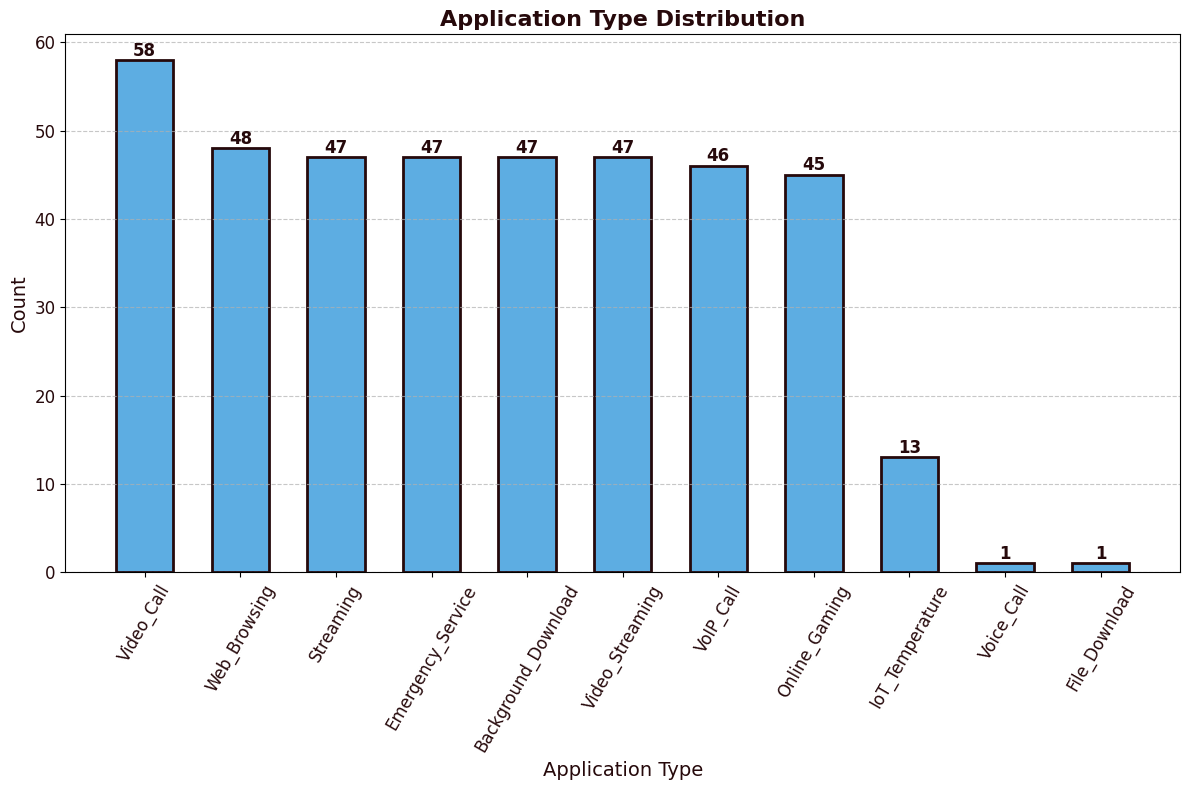

In [6]:
import matplotlib.pyplot as plt

def plot_application_type(df):
    try:
        # Count the occurrences of each Application Type
        application_type_counts = df['Application_Type'].value_counts()

        # Create a bar plot
        plt.figure(figsize=(12, 8))
        bars = plt.bar(application_type_counts.index, application_type_counts.values, color="#5DADE2", edgecolor='#26090b', linewidth=2, width=0.6)
        
        # Adding data labels on top of the bars
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(yval), ha='center', va='bottom', fontsize=12, color='#26090b', fontweight='bold')

        # Add labels and title
        plt.xlabel("Application Type", fontsize=14, color='#26090b')
        plt.ylabel("Count", fontsize=14, color='#26090b')
        plt.title("Application Type Distribution", fontsize=16, fontweight='bold', color='#26090b')
        plt.xticks(rotation=60, fontsize=12, color='#26090b')
        plt.yticks(fontsize=12, color='#26090b')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Display the plot
        plt.show()

    except Exception as e:
        print_error(str(e))

# Example usage
plot_application_type(df)


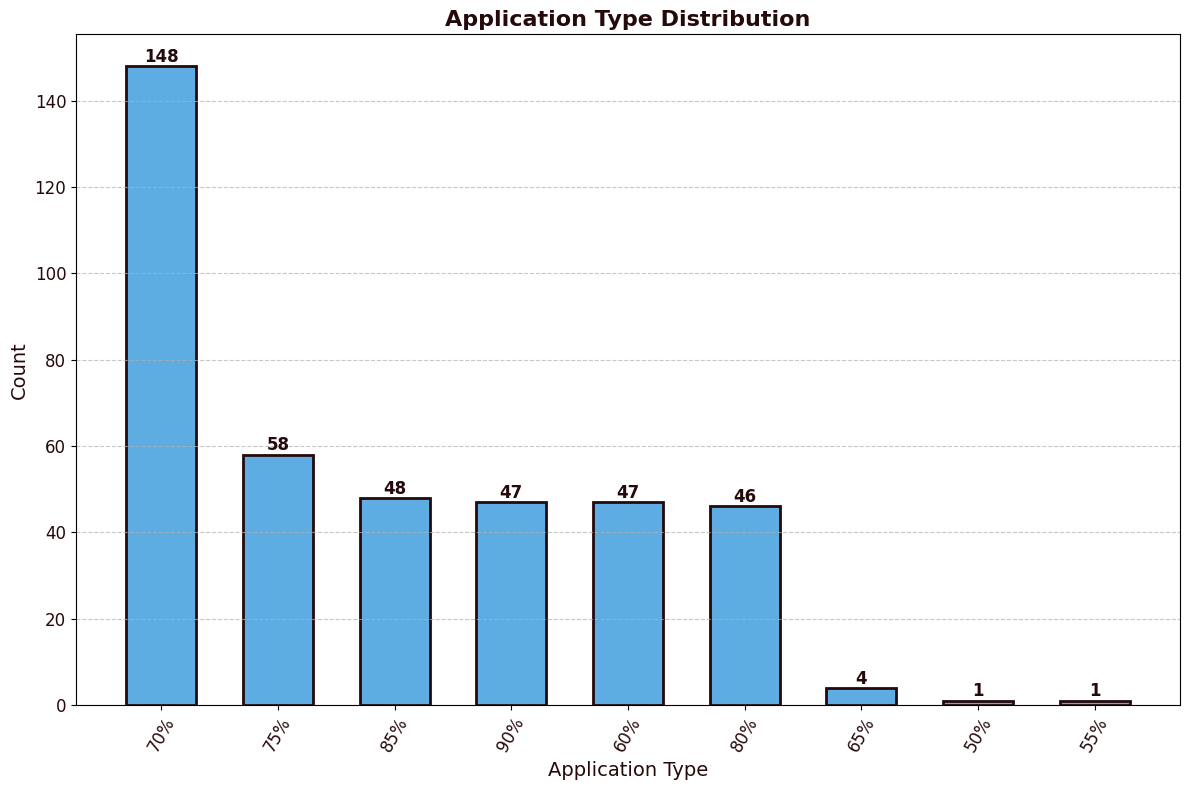

In [7]:
import matplotlib.pyplot as plt

def plot_application_type(df):
    try:
        # Count the occurrences of each Application Type
        application_type_counts = df['Resource_Allocation'].value_counts()

        # Create a bar plot
        plt.figure(figsize=(12, 8))
        bars = plt.bar(application_type_counts.index, application_type_counts.values, color="#5DADE2", edgecolor='#26090b', linewidth=2, width=0.6)
        
        # Adding data labels on top of the bars
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(yval), ha='center', va='bottom', fontsize=12, color='#26090b', fontweight='bold')

        # Add labels and title
        plt.xlabel("Application Type", fontsize=14, color='#26090b')
        plt.ylabel("Count", fontsize=14, color='#26090b')
        plt.title("Application Type Distribution", fontsize=16, fontweight='bold', color='#26090b')
        plt.xticks(rotation=60, fontsize=12, color='#26090b')
        plt.yticks(fontsize=12, color='#26090b')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Display the plot
        plt.show()

    except Exception as e:
        print_error(str(e))

# Example usage
plot_application_type(df)

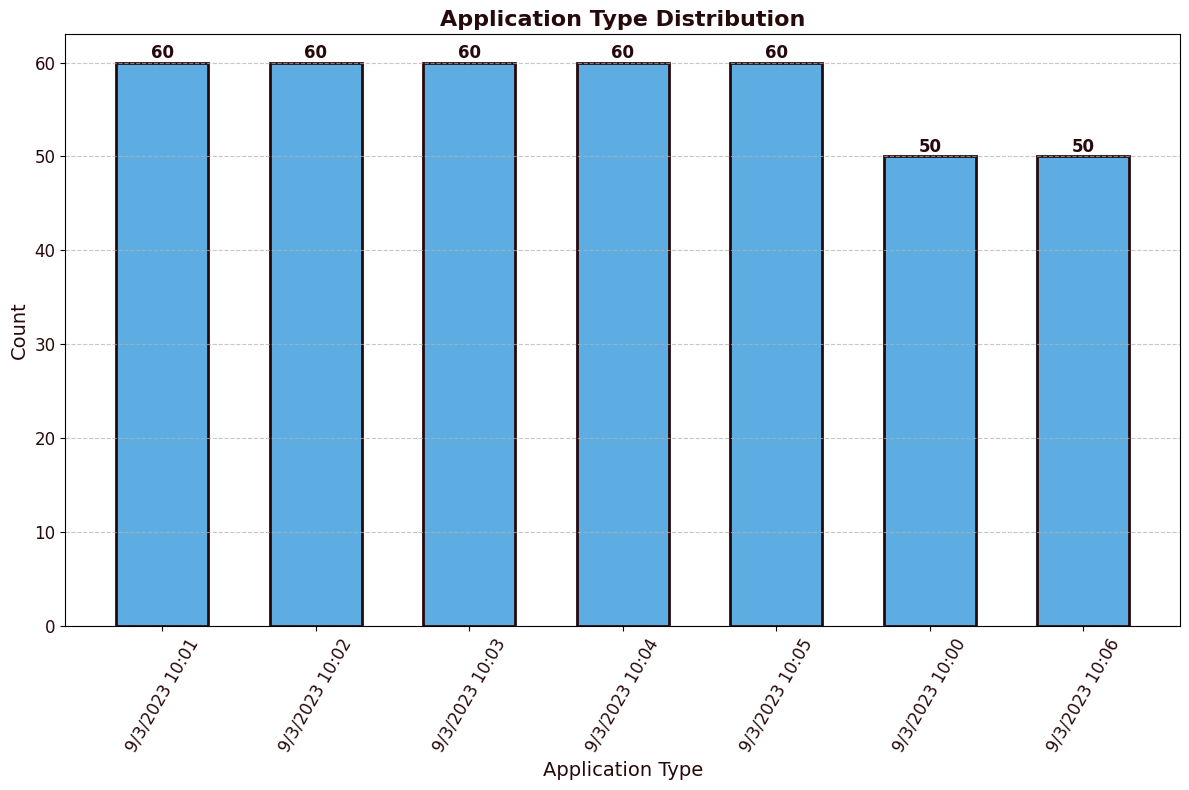

In [8]:
def plot_application_type(df):
    try:
        # Count the occurrences of each Application Type
        application_type_counts = df['Timestamp'].value_counts()

        # Create a bar plot
        plt.figure(figsize=(12, 8))
        bars = plt.bar(application_type_counts.index, application_type_counts.values, color="#5DADE2", edgecolor='#26090b', linewidth=2, width=0.6)
        
        # Adding data labels on top of the bars
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(yval), ha='center', va='bottom', fontsize=12, color='#26090b', fontweight='bold')

        # Add labels and title
        plt.xlabel("Application Type", fontsize=14, color='#26090b')
        plt.ylabel("Count", fontsize=14, color='#26090b')
        plt.title("Application Type Distribution", fontsize=16, fontweight='bold', color='#26090b')
        plt.xticks(rotation=60, fontsize=12, color='#26090b')
        plt.yticks(fontsize=12, color='#26090b')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Display the plot
        plt.show()

    except Exception as e:
        print_error(str(e))

# Example usage
plot_application_type(df)

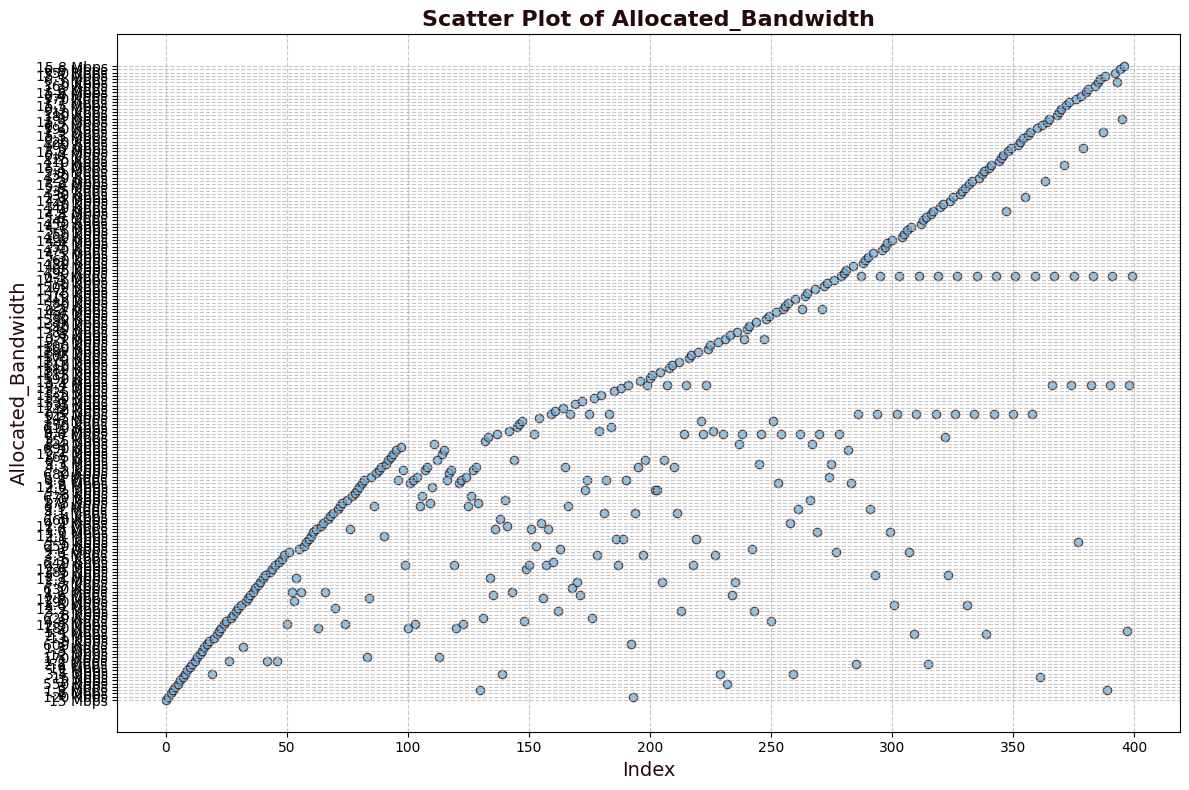

In [9]:
def plot_scatter_single_column(df):
    try:
        # Column for the scatter plot
        column = 'Allocated_Bandwidth'

        # Create a scatter plot
        plt.figure(figsize=(12, 8))
        plt.scatter(df.index, df[column], color="#5DADE2", edgecolor='#26090b', alpha=0.7)

        # Add labels and title
        plt.xlabel("Index", fontsize=14, color='#26090b')
        plt.ylabel(column, fontsize=14, color='#26090b')
        plt.title(f"Scatter Plot of {column}", fontsize=16, fontweight='bold', color='#26090b')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Display the plot
        plt.show()

    except Exception as e:
        print_error(str(e))

# Example usage
plot_scatter_single_column(df) # Uncomment this to run the function

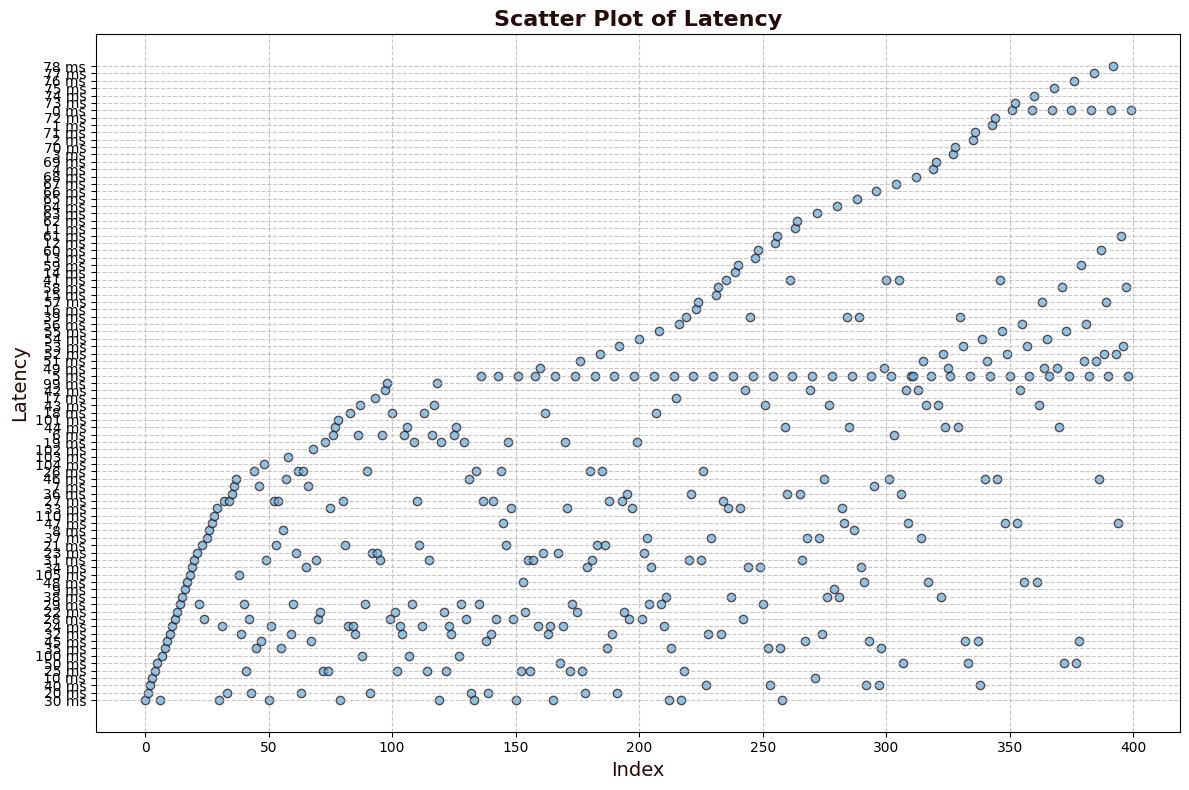

In [10]:
def plot_scatter_single_column(df):
    try:
        # Column for the scatter plot
        column = 'Latency'

        # Create a scatter plot
        plt.figure(figsize=(12, 8))
        plt.scatter(df.index, df[column], color="#5DADE2", edgecolor='#26090b', alpha=0.7)

        # Add labels and title
        plt.xlabel("Index", fontsize=14, color='#26090b')
        plt.ylabel(column, fontsize=14, color='#26090b')
        plt.title(f"Scatter Plot of {column}", fontsize=16, fontweight='bold', color='#26090b')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Display the plot
        plt.show()

    except Exception as e:
        print_error(str(e))

# Example usage
plot_scatter_single_column(df) # Uncomment this to run the function

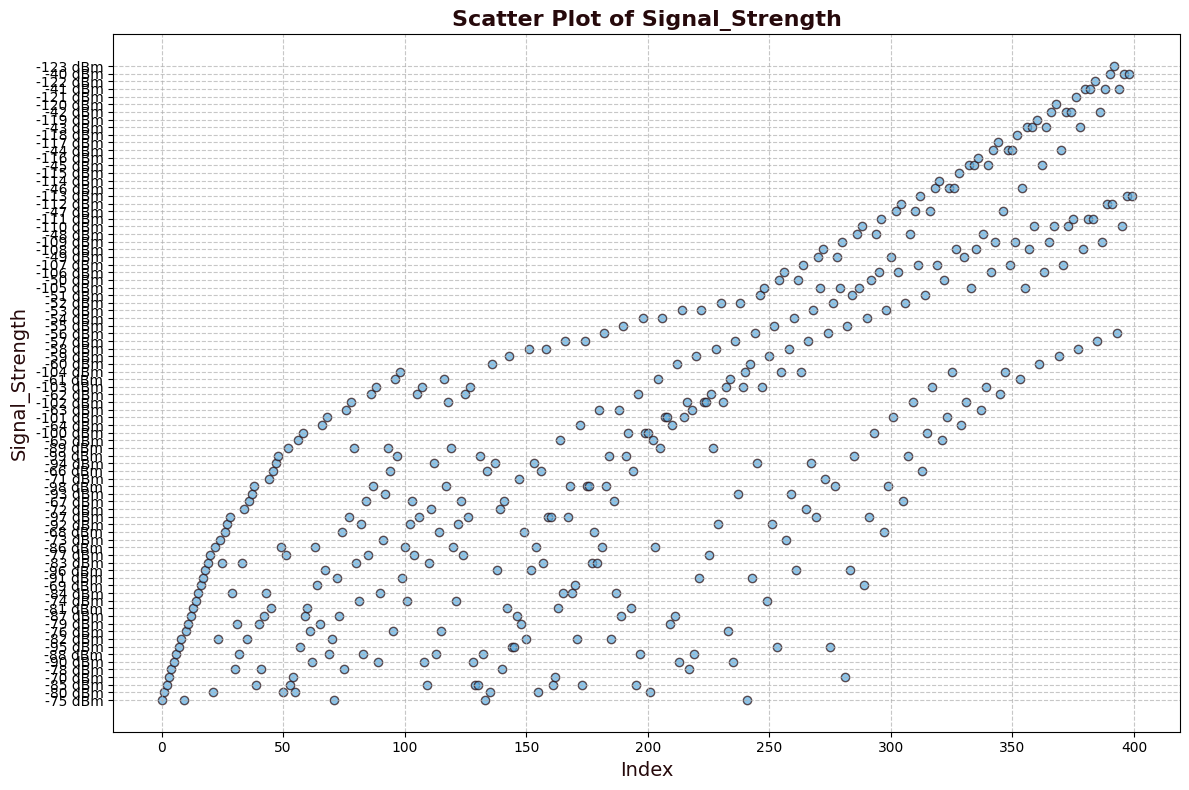

In [11]:
def plot_scatter_single_column(df):
    try:
        # Column for the scatter plot
        column = 'Signal_Strength'

        # Create a scatter plot
        plt.figure(figsize=(12, 8))
        plt.scatter(df.index, df[column], color="#5DADE2", edgecolor='#26090b', alpha=0.7)

        # Add labels and title
        plt.xlabel("Index", fontsize=14, color='#26090b')
        plt.ylabel(column, fontsize=14, color='#26090b')
        plt.title(f"Scatter Plot of {column}", fontsize=16, fontweight='bold', color='#26090b')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Display the plot
        plt.show()

    except Exception as e:
        print_error(str(e))

# Example usage
plot_scatter_single_column(df) # Uncomment this to run the function

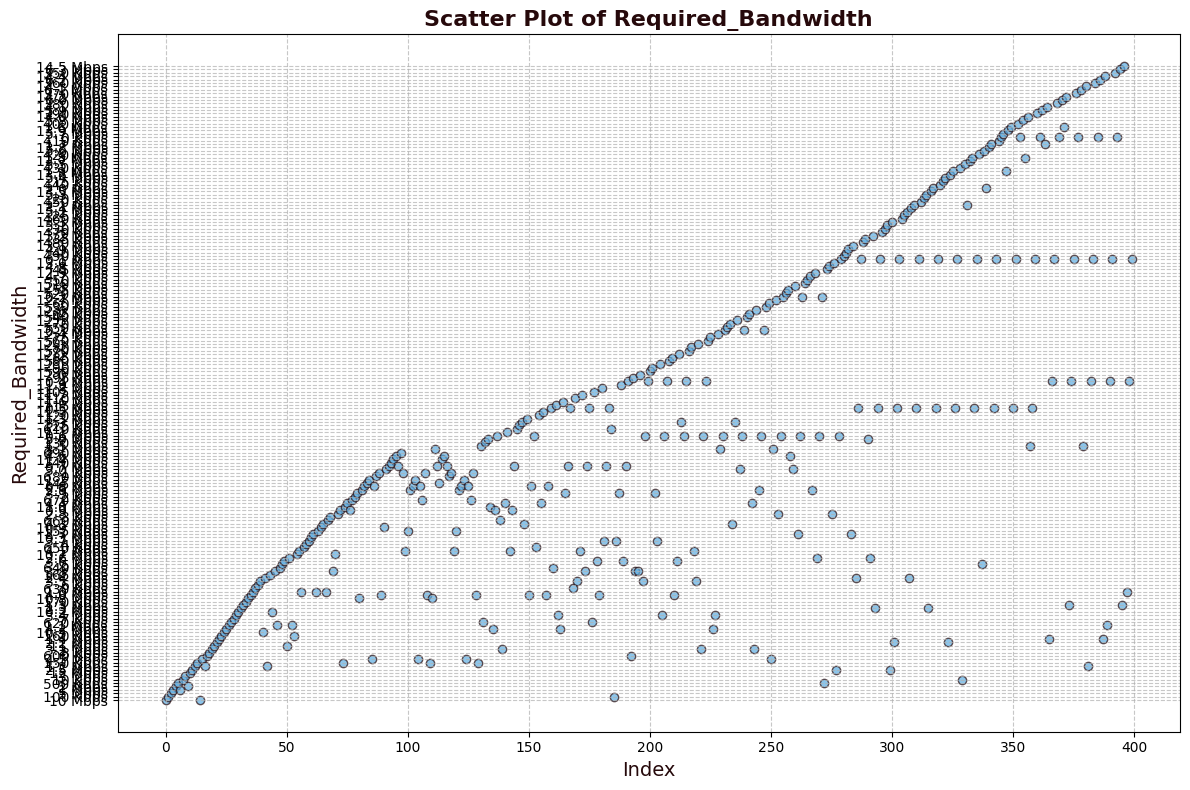

In [12]:
def plot_scatter_single_column(df):
    try:
        # Column for the scatter plot
        column = 'Required_Bandwidth'

        # Create a scatter plot
        plt.figure(figsize=(12, 8))
        plt.scatter(df.index, df[column], color="#5DADE2", edgecolor='#26090b', alpha=0.7)

        # Add labels and title
        plt.xlabel("Index", fontsize=14, color='#26090b')
        plt.ylabel(column, fontsize=14, color='#26090b')
        plt.title(f"Scatter Plot of {column}", fontsize=16, fontweight='bold', color='#26090b')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Display the plot
        plt.show()

    except Exception as e:
        print_error(str(e))

# Example usage
plot_scatter_single_column(df) #

In [13]:
from sklearn.preprocessing import OrdinalEncoder

# Arrange data in ordered categories
data = [['IoT_Temperature', 'Web_Browsing', 'VoIP_Call', 'Voice_Call', 'Video_Call', 'File_Download',
    'Background_Download', 'Streaming', 'Video_Streaming', 'Online_Gaming', 'Emergency_Service']]

encoder = OrdinalEncoder(categories=data)

print(df['Application_Type'].unique())
df['Application_Type'] = encoder.fit_transform(np.array(df['Application_Type']).reshape(-1,1))
print(df['Application_Type'].unique())

['Video_Call' 'Voice_Call' 'Streaming' 'Emergency_Service' 'Online_Gaming'
 'Background_Download' 'Web_Browsing' 'IoT_Temperature' 'Video_Streaming'
 'File_Download' 'VoIP_Call']
[ 4.  3.  7. 10.  9.  6.  1.  0.  8.  5.  2.]


In [14]:
df['Resource_Allocation'] = df['Resource_Allocation'].str.replace('%','').astype('int')


In [15]:
df['User_ID'] = df['User_ID'].str.replace('User_','').astype('int')


In [16]:
# Bandwidth contains 2 units : Kbps and Mbps, where Kbps=1000*Mbps
# Mbps : Convert to Kbps
# Kbps : Leave as it is

def mbps_to_kbps(value):  
    if 'Mbps' in value:
        n = float(value.replace(' Mbps',''))
        return str(n*1000)+' Kbps'
    else:
        return value


df['Required_Bandwidth'] = df['Required_Bandwidth'].map(mbps_to_kbps)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].map(mbps_to_kbps)

In [17]:
# Remove unwanted substr and convert df['Required_Bandwidth'] and 
# df['Allocated_Bandwidth'] to int dtype

df['Required_Bandwidth'] = df['Required_Bandwidth'].str.replace(' Kbps','').astype('float')
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].str.replace(' Kbps','').astype('float')

In [18]:
# Remove unwanted substr and convert df['Latency'] to int dtype
df['Latency'] = df['Latency'].str.replace(' ms','').astype('int')

In [19]:
# Remove unwanted substr and convert df['Signal_Strength'] to int dtype
df['Signal_Strength'] = df['Signal_Strength'].str.replace(' dBm','').astype('int')

In [20]:
# Cast 'Timestamp' col dtype from object to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [21]:
# 'User_ID' having very less effect on result, so remove it
df.drop('User_ID', axis=1, inplace=True)

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split ,KFold
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [27]:
# Define features and target
X = df.drop(columns=['Required_Bandwidth'])
y = df['Required_Bandwidth']

In [28]:
# # Split data into training, validation, and testing sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [33]:
# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
mse_list = []
mae_list = []
r2_list = []



In [34]:
# Cross-Validation loop
for train_index, val_index in kf.split(X):
    X_train, X_valid = X.iloc[train_index], X.iloc[val_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[val_index]
    
    # Initialize CatBoostRegressor with stabilized hyperparameters
    model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, random_seed=42, l2_leaf_reg=3)

    # Create Pools for training and validation data
    train_pool = Pool(X_train, y_train)
    valid_pool = Pool(X_valid, y_valid)

    # Fit the model
    model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=50, verbose=False)
    
    # Make predictions
    y_pred = model.predict(X_valid)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_valid, y_pred)
    mae = mean_absolute_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)
    
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)

# Calculate mean metrics
mean_mse = np.mean(mse_list)
mean_mae = np.mean(mae_list)
mean_r2 = np.mean(r2_list)

print(f'Mean Squared Error: {mean_mse}')
print(f'Mean Absolute Error: {mean_mae}')
print(f'R^2 Score: {mean_r2}')


Mean Squared Error: 35063.33648575196
Mean Absolute Error: 90.63791790553925
R^2 Score: 0.9977181175075597
